**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (3692, 2812)


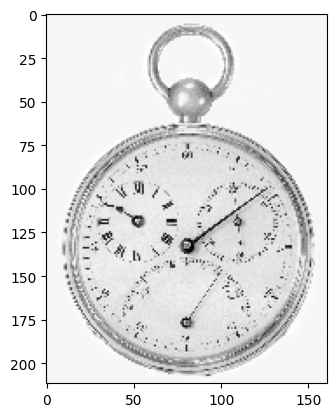

In [20]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np


def image_scale_factor(old_dpi, new_dpi):
    scale_factor = old_dpi / new_dpi

    return scale_factor


def image_new_dimensions(original_img, scale_factor):
    linhas = int(original_img.shape[0] / scale_factor)
    colunas  = int(original_img.shape[1] / scale_factor)

    return [linhas, colunas]


def resize_image(original_img, new_dimensions, scale_factor):
    img_res = np.zeros((new_dimensions[0], new_dimensions[1]), np.uint8)

    # for linhas
    for i in range(len(img_res)):
        #for y colunas
        for j in range(len(img_res[0])):
            img_res[i,j] = original_img[int(i*scale_factor), int(j*scale_factor)]

    return img_res


img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print('Tamanho da imagem : ',img.shape)

original_dpi = 1250
desired_dpi_list = [300, 150, 72]

for dpi in desired_dpi_list:
    scale_factor = image_scale_factor(old_dpi=original_dpi, new_dpi=dpi)
    dimensions = image_new_dimensions(original_img=img, scale_factor=scale_factor)
    new_image = resize_image(original_img=img, new_dimensions=dimensions, scale_factor=scale_factor)

    cv2.imwrite(f'relogio_{dpi}_dpi.tif', new_image)

Tamanho da imagem :  (886, 674)


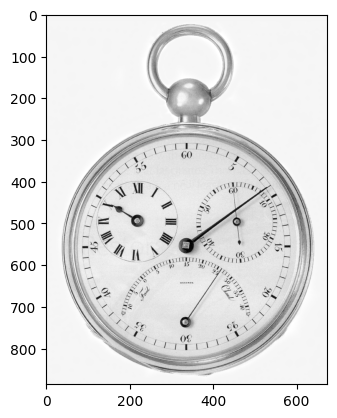

In [21]:
img = cv2.imread(f"relogio_{300}_dpi.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print('Tamanho da imagem : ',img.shape)

Tamanho da imagem :  (443, 337)


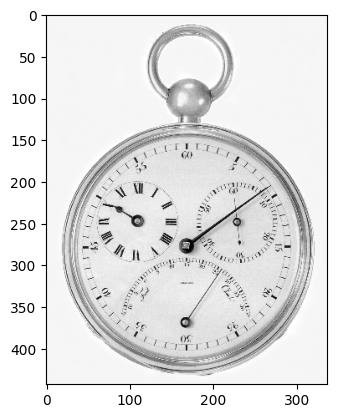

In [22]:
img = cv2.imread(f"relogio_{150}_dpi.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print('Tamanho da imagem : ',img.shape)

Tamanho da imagem :  (212, 161)


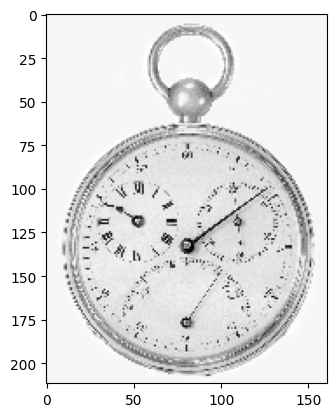

In [23]:
img = cv2.imread(f"relogio_{72}_dpi.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print('Tamanho da imagem : ',img.shape)

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

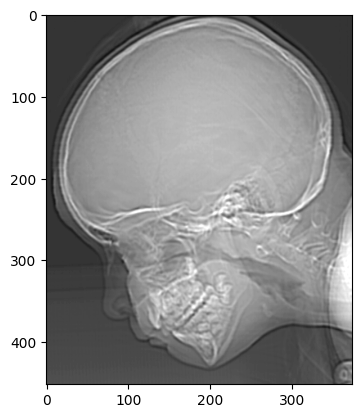

In [56]:
skull_img = cv2.imread(f'ctskull-256.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(skull_img, cmap='gray', vmin=0, vmax=255)

In [4]:
import numpy as np
import cv2

# Load image
img = cv2.imread('ctskull-256.tif')

def quantization(img, n_bits):
    max_pixel_value = np.amax(img)+1
    #keeps the range between 0 and 255
    qnt_image = np.uint8( img / (max_pixel_value/float(n_bits)))
    qnt_image_final = np.uint8((qnt_image/(n_bits-1.))*255)
    return qnt_image_final

bits_values = 7

while bits_values > 0:
    cv2.imwrite(f'skull_{bits_values}_bits.tif', quantization(img, 2**bits_values))
    bits_values = bits_values - 1